In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [7]:
data=pd.read_csv("wisc_bc_data.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    int64  
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [10]:
X=data.drop(["diagnosis","id"],axis=1)

In [11]:
Y=data["diagnosis"]

In [12]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

# Splitting Training and Test data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Building Neural Network

In [15]:
#Early Stopping 
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [16]:
model = keras.Sequential()

In [17]:
model.add(Dense(units=256, activation='relu', input_dim=30))
layers.BatchNormalization()
model.add(Dense(units=512, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=512, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1,activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics='binary_accuracy')

In [19]:
history=model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100, batch_size=64,callbacks=[early_stopping])

Epoch 1/100
8/8 [==============================] - 2s 162ms/step - loss: 43.6083 - binary_accuracy: 0.5187 - val_loss: 4.2411 - val_binary_accuracy: 0.3158
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 2.8602 - binary_accuracy: 0.5231 - val_loss: 3.1005 - val_binary_accuracy: 0.7281
Epoch 3/100
8/8 [==============================] - 0s 34ms/step - loss: 1.4005 - binary_accuracy: 0.7538 - val_loss: 0.8850 - val_binary_accuracy: 0.8860
Epoch 4/100
8/8 [==============================] - 0s 32ms/step - loss: 1.0479 - binary_accuracy: 0.7758 - val_loss: 0.3647 - val_binary_accuracy: 0.8772
Epoch 5/100
8/8 [==============================] - 0s 30ms/step - loss: 1.7365 - binary_accuracy: 0.6703 - val_loss: 0.3203 - val_binary_accuracy: 0.8947
Epoch 6/100
8/8 [==============================] - 0s 31ms/step - loss: 0.5635 - binary_accuracy: 0.8154 - val_loss: 0.6567 - val_binary_accuracy: 0.8947
Epoch 7/100
8/8 [==============================] - 0s 31ms/step - loss: 0.

Epoch 54/100
8/8 [==============================] - 0s 35ms/step - loss: 0.1723 - binary_accuracy: 0.9341 - val_loss: 0.1714 - val_binary_accuracy: 0.9211
Epoch 55/100
8/8 [==============================] - 0s 34ms/step - loss: 0.1819 - binary_accuracy: 0.9253 - val_loss: 0.1565 - val_binary_accuracy: 0.9298
Epoch 56/100
8/8 [==============================] - 0s 32ms/step - loss: 0.1784 - binary_accuracy: 0.9297 - val_loss: 0.1961 - val_binary_accuracy: 0.9298
Epoch 57/100
8/8 [==============================] - 0s 30ms/step - loss: 0.2069 - binary_accuracy: 0.9253 - val_loss: 0.1589 - val_binary_accuracy: 0.9298
Epoch 58/100
8/8 [==============================] - 0s 32ms/step - loss: 0.2253 - binary_accuracy: 0.9143 - val_loss: 0.1952 - val_binary_accuracy: 0.9211
Epoch 59/100
8/8 [==============================] - 0s 35ms/step - loss: 0.3482 - binary_accuracy: 0.8923 - val_loss: 0.2071 - val_binary_accuracy: 0.8947
Epoch 60/100
8/8 [==============================] - 0s 29ms/step - los

# Model Training Graph

Minimum validation loss: 0.1382056474685669


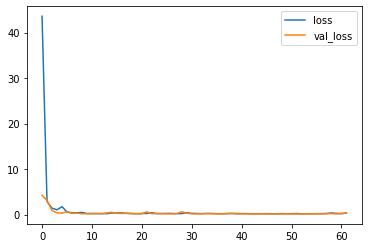

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [21]:
#Train Data accuracy
y_TrainAccuracy = model.predict(X_train)
y_TrainAccuracy = [0 if val < 0.5 else 1 for val in y_TrainAccuracy]
accuracy_score(Y_train, y_TrainAccuracy)

0.9362637362637363

In [22]:
#Test Data accuracy
y_TestAccuracy = model.predict(X_test)
y_TestAccuracy = [0 if val < 0.5 else 1 for val in y_TestAccuracy]
accuracy_score(Y_test, y_TestAccuracy)

0.9298245614035088

In [23]:
#As we have used Early Stopping the data neither underfitted nor overfitted. The model training is evident from the above Graph

In [25]:
user_input=(20.59,21.24,137.8,1320,0.1085,0.1644,0.2188,0.1121,0.1848,0.06222,0.5904,1.216,4.206,75.09,0.006666,0.02791,0.04062,0.01479,0.01117,0.003727,23.86,30.76,163.2,1760,0.1464,0.3597,0.5179,0.2113,0.248,0.08999
)

#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=model.predict(userInputReshaped)
print(prediction)
if(prediction>0.5):
  print("You have Malignant Breast Cancer")
else:
    print("You have benign(Not harmful) Breast Cancer")

[[0.99989617]]
You have Malignant Breast Cancer
